# Sigma 3 twinning overlaps computer

In [10]:
from scipy.spatial.transform import Rotation
import numpy as np, pylab as pl
import ImageD11.unitcell

In [11]:
# this is the rotation 180 degree around 111 (sigma3 twin)
v = np.array((1,1,1))
n = v / np.linalg.norm(v)
SigmaU = Rotation.from_rotvec(180*n, degrees=True).as_matrix()

In [12]:
# peak generation
a  = 3.61
uc = ImageD11.unitcell.unitcell([a,a,a,90,90,90], 'F')
uc.makerings( 5 )
hkls = np.concatenate( [ uc.ringhkls[ds] for ds in uc.ringds ] ).T
hkls.shape

(3, 6182)

# 
g = (UB).h

h = inv(UB).g = inv(B).inv(U).g

UB == I

g = Ut.h
h = Ut.T g


In [13]:
# this is Utwin . hkl 
# we assume the U matrix for the grain is the identity
gcalc = uc.B.dot( hkls )
gtwin = SigmaU.dot( gcalc )

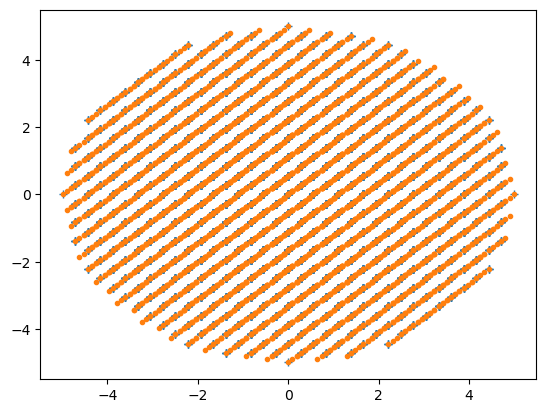

In [14]:
pl.figure()
pl.plot( gcalc[0], gcalc[1], '+')
pl.plot( gtwin[0], gtwin[1], '.')

In [15]:
ubi = np.linalg.inv( uc.B )
h = hindexed_from_twin = ubi.dot( gtwin )
olaps = ((h - np.round(h))**2).sum(axis=0) < 0.05

In [16]:
modh = (hkls**2).sum(axis=0)

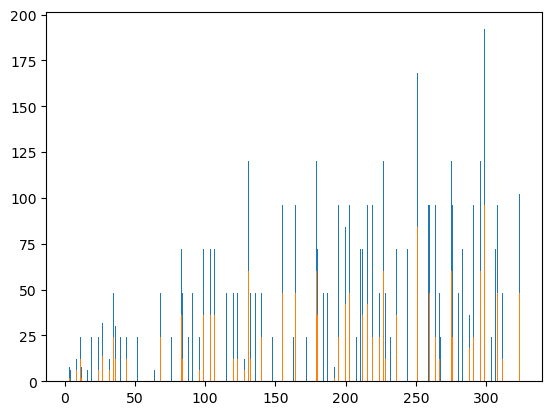

In [17]:
pl.hist(modh,bins = modh.max()*2)
pl.hist(modh[olaps],bins = modh.max()*2);

In [18]:
order = np.argsort( modh )
c= 0
print("#sum(h^2) [h k l] multiplicity #overlaps_percent")
for i in order:
    if modh[i] == c: # dont print M times the same
        continue
    c = modh[i]
    m = (modh[i] == modh)
    print( "( %2d %2d %2d )"%tuple(hkls[:,i]), "%5d  %5d   %5d"%(m.sum(), m[olaps].sum(), 100*m[olaps].sum()/m.sum(), ))

#sum(h^2) [h k l] multiplicity #overlaps_percent
( -1 -1 -1 )     8      2      25
(  2  0  0 )     6      0       0
(  0  2  2 )    12      6      50
( -1  1 -3 )    24     12      50
(  2  2  2 )     8      2      25
( -4  0  0 )     6      0       0
(  1  3 -3 )    24      0       0
(  0  4  2 )    24     12      50
(  4  2  2 )    24      6      25
(  1 -5  1 )    32     14      43
(  0  4  4 )    12      6      50
(  1 -3  5 )    48     24      50
(  2  4  4 )    30     12      40
( -2  0  6 )    24      0       0
( -3  3 -5 )    24      0       0
( -2  2 -6 )    24     12      50
(  4  4  4 )     8      2      25
(  1 -5 -5 )    48     12      25
(  4  6  0 )    24      0       0
(  4 -2 -6 )    48     24      50
(  3  5 -5 )    72     36      50
(  0  8  0 )     6      0       0
(  7  3  3 )    24      0       0
(  0  8 -2 )    48     24      50
( -2 -8  2 )    36     18      50
(  7  1  5 )    56     14      25
(  2  6 -6 )    24      0       0
(  0  8 -4 )    24     12      50